<a href="https://colab.research.google.com/github/shivanshtiwari14/Handwriting_Recognition/blob/main/MNIST_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("mnist_train.csv")

In [ ]:
df.head()

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,pixel 16,pixel 17,pixel 18,pixel 19,pixel 20,pixel 21,pixel 22,pixel 23,pixel 24,pixel 25,pixel 26,pixel 27,pixel 28,pixel 29,pixel 30,pixel 31,pixel 32,pixel 33,pixel 34,pixel 35,pixel 36,pixel 37,pixel 38,...,pixel 744,pixel 745,pixel 746,pixel 747,pixel 748,pixel 749,pixel 750,pixel 751,pixel 752,pixel 753,pixel 754,pixel 755,pixel 756,pixel 757,pixel 758,pixel 759,pixel 760,pixel 761,pixel 762,pixel 763,pixel 764,pixel 765,pixel 766,pixel 767,pixel 768,pixel 769,pixel 770,pixel 771,pixel 772,pixel 773,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = df.values
X = data[:,1:]
Y = data[:,0]

array([1., 0., 1., ..., 6., 5., 3.])

In [ ]:
split = int(0.8*X.shape[0])
X_train = X[:split,:]
Y_train = Y[:split]
X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1372, 784) (1372,)
(344, 784) (344,)


2


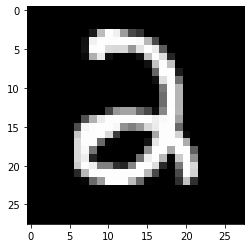

In [ ]:
def drawimg(sample):
  img = sample.reshape((28,28))
  plt.imshow(img,cmap="gray")
  plt.show

drawimg(X_test[98])
print(int(Y_test[98]))

##KNN

In [ ]:
def dist(x1,x2):
  return np.sqrt(sum((x1 - x2)**2))

def knn(X,Y,query,k):

  vals = []
  m = X.shape[0]

  for i in range(m):
    d = dist(query,X[i])
    vals.append((d,int(Y[i])))

  vals = sorted(vals)
  vals = vals[:k]
  vals = np.array(vals)

  new_vals = np.unique(vals[:,1],return_counts=True)
  index = new_vals[1].argmax()
  pred = new_vals[0][index]

  return(int(pred))

##Working

1


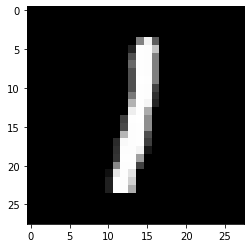

In [ ]:
print(knn(X_train,Y_train,X_test[1],5))
drawimg(X_test[1])

##Accuracy

In [ ]:
n = X_test.shape[0]
Corr = 0
for i in range(n):
  pred_val = knn(X_train,Y_train,X_test[i],5)
  if pred_val == Y_test[i]:
    Corr += 1

In [ ]:
percent_acc =  Corr/n * 100
print("knn is {}% accurate".format(round(percent_acc,2)))

knn is 90.12% accurate
